<a href="https://colab.research.google.com/github/GornostaevGO/StatPrak24/blob/main/4_pandas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Homework

The homework is to prepare a report for the Ministry of Transport, revealing the nature and characteristics of flight delays. The report should help identify problem areas and contribute to decision-making. Therefore, strive not to state general facts, but to show problems. For example, the fact "the average departure delay is 15 minutes" by itself says little and does not help to understand why this is happening. On the contrary, a graph showing that on Mondays delays increase threefold compared to other days against the background of an increase in the number of flights and passengers suggests a possible cause of the problem: airports cannot cope with uneven load.

The report should be in the form of a notebook with a clear structure. At the beginning of the Markdown cell there is a brief description of the question under study (what we will study), then the code and all its outputs (tables, graphs, values), then again in the Markdown cell in which your brief conclusion is formulated.

The report should contain at least 5 results confirmed by graphs. For variety of material, use different types of diagrams. All graphs should be provided with the necessary signatures (axis designations, title, color scheme legend).

To solve the problems, use the methods of the pandas library.

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#### Предобработка данных

In [17]:
df = pd.read_csv('/content/flights.csv', low_memory = False)

In [18]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [19]:
# будем работать сразу с датами для удобства
df['DATE'] = pd.to_datetime(df[['YEAR', 'MONTH', 'DAY']])
df = df.drop(['YEAR', 'MONTH', 'DAY'], axis = 1)

In [20]:
# очистим данные от выбросов в названиях аэропортов
df = df.loc[(df.ORIGIN_AIRPORT.apply(len) == 3) &
            (df.DESTINATION_AIRPORT.apply(len) == 3)]
df.head()

,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,DEPARTURE_TIME,DEPARTURE_DELAY,TAXI_OUT,...,ARRIVAL_DELAY,DIVERTED,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY,DATE
0,4,AS,98,N407AS,ANC,SEA,5,2354.0,-11.0,21.0,...,-22.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,2015-01-01
1,4,AA,2336,N3KUAA,LAX,PBI,10,2.0,-8.0,12.0,...,-9.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,2015-01-01
2,4,US,840,N171US,SFO,CLT,20,18.0,-2.0,16.0,...,5.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,2015-01-01
3,4,AA,258,N3HYAA,LAX,MIA,20,15.0,-5.0,15.0,...,-9.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,2015-01-01
4,4,AS,135,N527AS,SEA,ANC,25,24.0,-1.0,11.0,...,-21.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,2015-01-01


In [21]:
# избавляюсь от None-значений в столбцах времени отправления
df = df.loc[~df[['DEPARTURE_TIME']].isna().any(axis=1)]
print(df[['DEPARTURE_TIME']].isna().sum())

DEPARTURE_TIME    0
dtype: int64


In [22]:
# нашему рассмотрению представлены данные за весь 2015-ый год, следовательно не должно быть смещений из-за периодичности
print(df.DATE.min(), ' - ', df.DATE.max())

2015-01-01 00:00:00  -  2015-03-25 00:00:00


In [23]:
cols = list(df.columns)
df = df[cols[-1:] + cols[:-1]]
df.head()
# заметим, что часть рейсов вылетает раньше положенного времени отправления

,DATE,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,DEPARTURE_TIME,DEPARTURE_DELAY,...,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
0,2015-01-01,4,AS,98,N407AS,ANC,SEA,5,2354.0,-11.0,...,408.0,-22.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
1,2015-01-01,4,AA,2336,N3KUAA,LAX,PBI,10,2.0,-8.0,...,741.0,-9.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
2,2015-01-01,4,US,840,N171US,SFO,CLT,20,18.0,-2.0,...,811.0,5.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
3,2015-01-01,4,AA,258,N3HYAA,LAX,MIA,20,15.0,-5.0,...,756.0,-9.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,2015-01-01,4,AS,135,N527AS,SEA,ANC,25,24.0,-1.0,...,259.0,-21.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


### 1. В каких аэропортах придется ждать отправления в среднем дольше всего и почему?

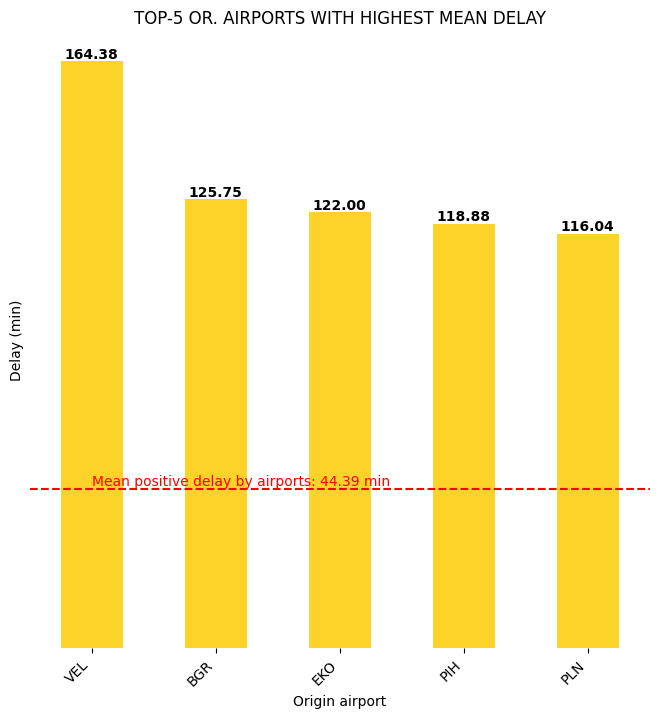

In [24]:
prob1 = df[df['DEPARTURE_DELAY'] > 0].groupby('ORIGIN_AIRPORT').mean('DEPARTURE_DELAY').sort_values(by='DEPARTURE_DELAY', ascending=False).reset_index()
mean_pos_delay = prob1.DEPARTURE_DELAY.mean()
prob1 = prob1[['ORIGIN_AIRPORT','DEPARTURE_DELAY']].head(5)

# рисую картинку
prob1.plot(x='ORIGIN_AIRPORT', y='DEPARTURE_DELAY', kind='bar', figsize=(8, 8), color='#FED329')
plt.xlabel('Origin airport')
plt.xticks(rotation=45, ha='right')
plt.ylabel('Delay (min)')
plt.title('TOP-5 OR. AIRPORTS WITH HIGHEST MEAN DELAY')
plt.axhline(y=mean_pos_delay, color='r', linestyle='--')
plt.text(x=0, y=mean_pos_delay + 1, s=f'Mean positive delay by airports: {mean_pos_delay:.2f} min', color='r')
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.set_yticks([])
for bar in ax.patches:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width() / 2.0, bar.get_y() + height, f'{height:.2f}', ha='center', va='bottom', color='black', fontweight='bold')

plt.legend().set_visible(False)
plt.show()

Заметим, что эта пятерка значительно превосходит среднее время задержки вылета по аэропортам (в 2-3 раза). Рассмотрим по каким причинам задерживаются вылеты из них.

['OO' 'EV']
Количество задержанных рейсов: 63, сравнительно немного, но каждый из них стал серьезной добавкой к среднему времени.


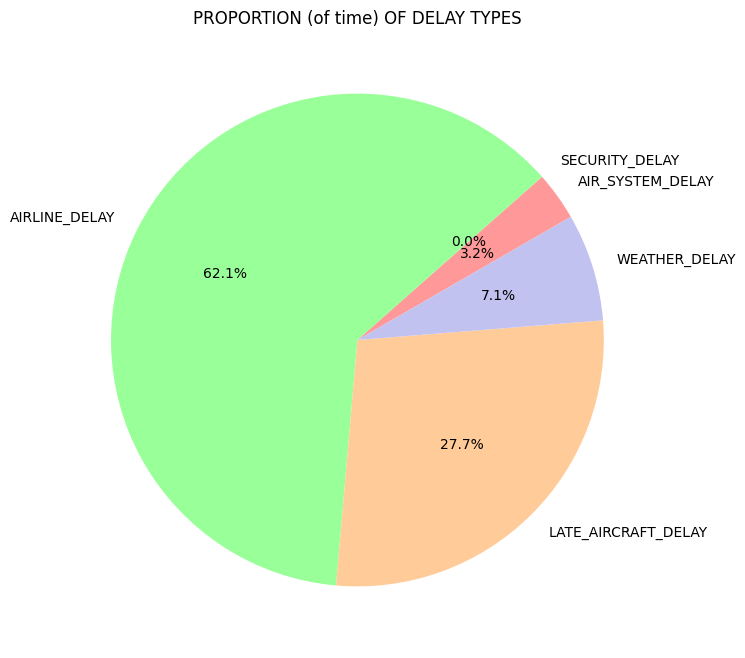

In [25]:
prob1df = df.merge(prob1, on='ORIGIN_AIRPORT', how='inner')
print(prob1df.AIRLINE.unique())
prob1df = prob1df[prob1df['DEPARTURE_DELAY_x'] > 0]
print('Количество задержанных рейсов: '+ str(len(prob1df)) + ', сравнительно немного, но каждый из них стал серьезной добавкой к среднему времени.')
prob1df = prob1df[['AIR_SYSTEM_DELAY', 'SECURITY_DELAY', 'AIRLINE_DELAY', 'LATE_AIRCRAFT_DELAY', 'WEATHER_DELAY']].dropna()

# сумма по каждому типу задержек
delay_sums = prob1df.sum(axis=0)
# строю pie chart
labels = delay_sums.index
sizes = delay_sums.values
colors = ['#ff9999','#66b3ff','#99ff99','#ffcc99','#c2c2f0']

plt.figure(figsize=(8, 8))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=30, colors=colors)

plt.title('PROPORTION (of time) OF DELAY TYPES')
plt.show()

**Более 85% суммарного времени** задержек в этих 5 аэропортах вызваны авиакомпаниями, так 42.5% - задержки в конкретном рейсе, 44.8% - задержки, связанные с поздним прибытием самолета (с предыдущего рейса). Министерству следует обратить внимание на деятельность **Авиакомпании SkyWest (OO)**, это единственная компания, летающая оттуда. Ещё и с такими задержками. По причине внутренних проблем компании пассажирам и приходится ждать своего вылета в среднем больше часа.

### 2. Какими авиакомпаниями лучше не пользоваться, если хотите успеть вовремя?

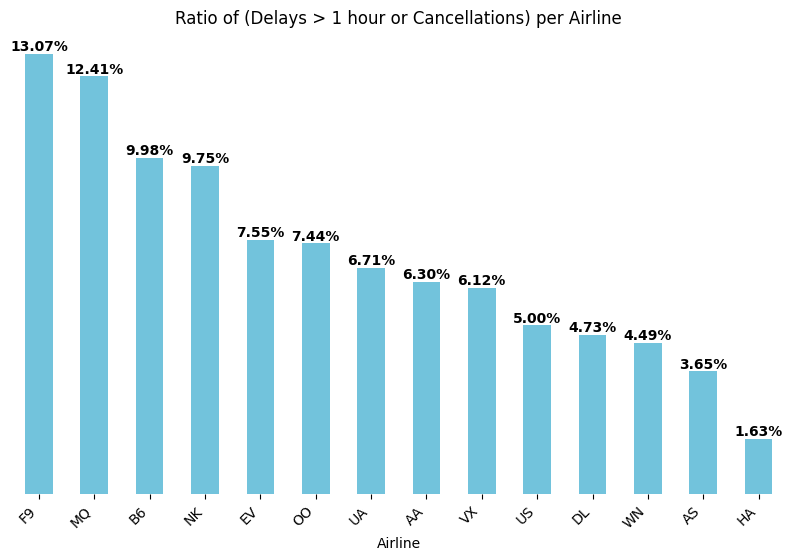

In [26]:
prob2 = df[(df['ARRIVAL_DELAY'] > 60) | (df['CANCELLED'] == 1)] # рейс либо отменили, либо самолет прилетел на 60 минут позже
prob2 = prob2.groupby('AIRLINE').size().reset_index()
yet_an_prob2 = df.groupby('AIRLINE').size().reset_index()
prob2df = yet_an_prob2.merge(prob2, on='AIRLINE', how='left')
prob2df['ratio'] = prob2df['0_y'] / prob2df['0_x']
prob2df = prob2df.sort_values(by='ratio', ascending=False)

# рисую график
prob2df.plot(x='AIRLINE', y='ratio', kind='bar', figsize=(10, 6), color='#72C3DC')

plt.xlabel('Airline')
plt.title('Ratio of (Delays > 1 hour or Cancellations) per Airline')
plt.xticks(rotation=45, ha='right')

ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.set_yticks([])
for bar in ax.patches:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width() / 2.0, bar.get_y() + height, f'{height*100:.2f}%', ha='center', va='bottom', color='black', fontweight='bold')

plt.legend().set_visible(False)
plt.show()

Spirit Airlines (NK) и Frontier Airlines (F9) возглавляют рейтинг. Летая этими компаниями, вы рискуете приблизительно раз в 10 рейсов серьёзно опоздать. Но по информации из открытых источников: эти авиакомпании - лоукостеры, т.е. билеты на них сравнительно дешёвые.

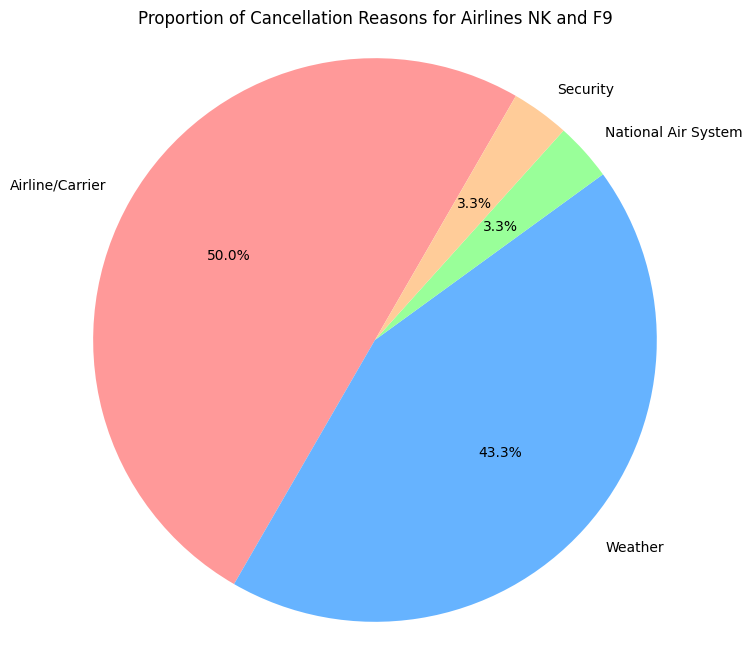

In [27]:
prob2 = df[((df['AIRLINE'] == 'NK') | (df['AIRLINE'] == 'F9')) & df['CANCELLED'] == 1]
grp2 = prob2.groupby('CANCELLATION_REASON').agg(
    total_flights=('FLIGHT_NUMBER', 'count')
)

labels = ['Airline/Carrier','Weather','National Air System','Security']
sizes = grp2['total_flights']
colors = ['#ff9999', '#66b3ff', '#99ff99', '#ffcc99']

plt.figure(figsize=(8, 8))

plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=60, colors=colors)

plt.title('Proportion of Cancellation Reasons for Airlines NK and F9')
plt.axis('equal')
plt.show()


Не всегда виноват перевозчик, часто рейсы отменялись из-за погоды.

### 3. Связь задержки на пути и загруженности самого пути

In [28]:
air_df = pd.read_csv('/content/airports.csv', low_memory=False)
air_df = air_df[['IATA_CODE', 'CITY', 'STATE']].drop_duplicates()

origin_df = df[['DATE', 'FLIGHT_NUMBER', 'ORIGIN_AIRPORT', 'DEPARTURE_DELAY']]
origin_df = origin_df.rename(columns={'ORIGIN_AIRPORT': 'IATA_CODE'})
destination_df = df[['DATE', 'FLIGHT_NUMBER', 'DESTINATION_AIRPORT', 'DEPARTURE_DELAY']]
destination_df = destination_df.rename(columns={'DESTINATION_AIRPORT': 'IATA_CODE'})

origin_prob = origin_df.merge(air_df, on='IATA_CODE', how='inner')
destination_prob = destination_df.merge(air_df, on='IATA_CODE', how='inner')

prob3 = origin_prob[['DATE', 'FLIGHT_NUMBER', 'STATE']].rename(columns={'STATE': 'ORIGIN_STATE'})
prob3['DESTINATION_STATE'] = destination_prob['STATE']
prob3['DEPARTURE_DELAY'] = origin_prob['DEPARTURE_DELAY']
prob3['DESTINATION_AIRPORT'] = df['DESTINATION_AIRPORT']
prob3['ORIGIN_AIRPORT'] = df['ORIGIN_AIRPORT']
prob3.head(10)

,DATE,FLIGHT_NUMBER,ORIGIN_STATE,DESTINATION_STATE,DEPARTURE_DELAY,DESTINATION_AIRPORT,ORIGIN_AIRPORT
0,2015-01-01,98,AK,WA,-11.0,SEA,ANC
1,2015-01-01,2336,CA,FL,-8.0,PBI,LAX
2,2015-01-01,840,CA,NC,-2.0,CLT,SFO
3,2015-01-01,258,CA,FL,-5.0,MIA,LAX
4,2015-01-01,135,WA,AK,-1.0,ANC,SEA
5,2015-01-01,806,CA,MN,-5.0,MSP,SFO
6,2015-01-01,612,NV,MN,-6.0,MSP,LAS
7,2015-01-01,2013,CA,NC,14.0,CLT,LAX
8,2015-01-01,1112,CA,TX,-11.0,DFW,SFO
9,2015-01-01,1173,NV,GA,3.0,ATL,LAS


In [29]:
prob3['ROUTE'] = prob3['ORIGIN_STATE'] + " -> " + prob3['DESTINATION_STATE']

grp_3 = prob3.groupby('ROUTE').agg(
    total_flights=('FLIGHT_NUMBER', 'count'),
    average_delay=('DEPARTURE_DELAY', 'mean')
).sort_values(by='total_flights', ascending=False)

a = grp_3['total_flights']
b = grp_3['average_delay']
# Вычисление корреляции
correlation_matrix = np.corrcoef(a, b)
print("Correlation coefficient:", correlation_matrix[0, 1])
grp_3.head(10)

Correlation coefficient: -0.026491849410448045


,total_flights,average_delay
ROUTE,,
CA -> CA,53611,9.430956
TX -> TX,44354,8.389638
FL -> NY,14018,19.084391
NY -> FL,13993,17.104123
HI -> HI,13840,0.596026
FL -> GA,13781,5.896814
GA -> FL,13774,7.266444
TX -> CA,13253,13.097638
CA -> TX,13095,9.959832


In [30]:
prob3['ROUTE_AIRPORTS'] = prob3['ORIGIN_AIRPORT'] + " -> " + prob3['DESTINATION_AIRPORT']

yet_an_grp_3 = prob3.groupby('ROUTE_AIRPORTS').agg(
    total_flights=('FLIGHT_NUMBER', 'count'),
    average_delay=('DEPARTURE_DELAY', 'mean')
).sort_values(by='total_flights', ascending=False)

a = yet_an_grp_3['total_flights']
b = yet_an_grp_3['average_delay']
# Вычисление корреляции
correlation_matrix = np.corrcoef(a, b)
print("Correlation coefficient:", correlation_matrix[0, 1])
yet_an_grp_3.head(10)

Correlation coefficient: -0.03584593798278645


,total_flights,average_delay
ROUTE_AIRPORTS,,
SFO -> LAX,2858,9.767670
JFK -> LAX,2843,11.136827
LAX -> JFK,2841,10.998944
LAX -> SFO,2800,10.248571
LAS -> LAX,2446,9.535568
LAX -> LAS,2364,10.972504
HNL -> OGG,2090,11.003349
OGG -> HNL,2086,11.007191
LGA -> ORD,2073,9.375301


При обоих рассмотрениях (сначала считал путь из штата в штат, после - из аэропорта в аэропорт) нагрузка пути, т.е. количество полетов по нему в год, слабо коррелирует со средней задержкой на этом маршруте. Эти величины почти независимы!

### 4. Как меняется задержка в зависимости от времени суток?

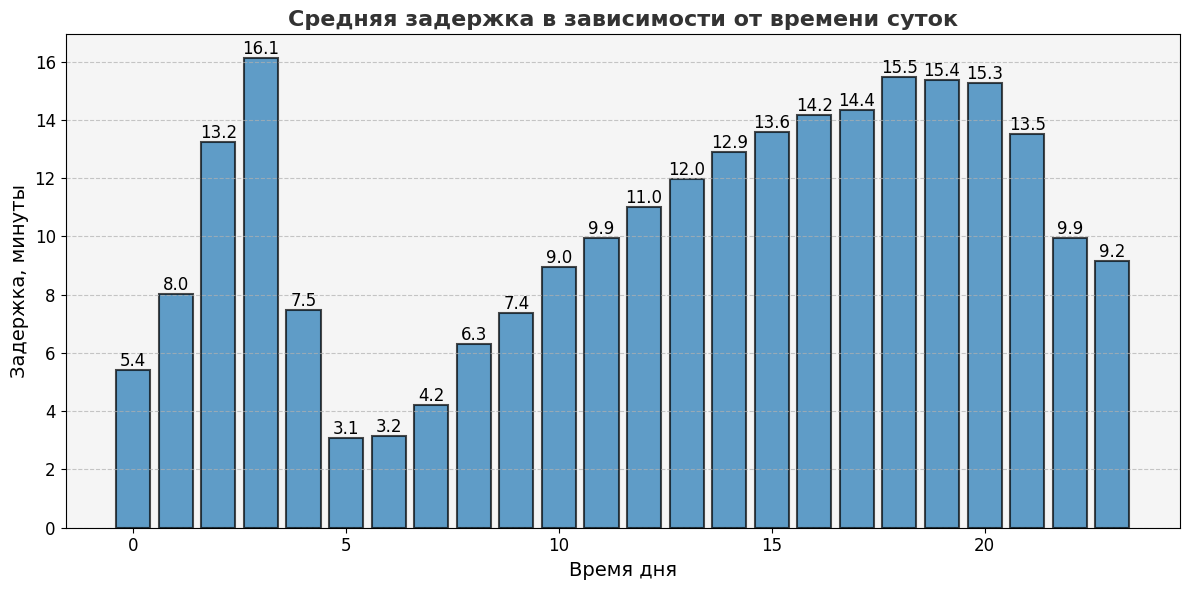

In [31]:
prob4 = df.copy()

prob4['SCHEDULED_DEPARTURE_HOUR'] = (prob4['SCHEDULED_DEPARTURE'] // 100).astype(int)

mean_delay_by_hour = prob4.groupby('SCHEDULED_DEPARTURE_HOUR')['DEPARTURE_DELAY'].mean()


plt.figure(figsize=(12, 6))

bars = plt.bar(mean_delay_by_hour.index, mean_delay_by_hour.values, color='#1f77b4', edgecolor='black', alpha=0.7)
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, f'{yval:.1f}', ha='center', va='bottom', fontsize=12, color='black')
    bar.set_linewidth(1.5)
    bar.set_edgecolor('black')

plt.title('Средняя задержка в зависимости от времени суток', fontsize=16, fontweight='bold', color='#333333')
plt.xlabel('Время дня', fontsize=14)
plt.ylabel('Задержка, минуты', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.gca().set_facecolor('whitesmoke')
plt.gcf().patch.set_facecolor('white')
plt.tight_layout()
plt.show()

За исключением промежутка с 0 до 4 утра, в котором не должно быть много рейсов из-за того что ночью люди не так охотно летают и работают, распределение задержки напоминает нормальное распределение с четко выраженным средним в районе 19 часов. Это говорит нам о том, что в послерабочее время задержка увеличивается, в связи с возросшей нагрузкой на аэропорт.

### 5. Как меняется время задержки рейса в зависимости от недели?

In [32]:
prob5 = df.copy()
prob5['week_number'] = prob5['DATE'].dt.isocalendar().week # номер недели от начала года
prob5['start_of_week'] = prob5['DATE'] - pd.to_timedelta(prob5['DATE'].dt.weekday, unit='d') # дата начала недели
grp5 = prob5.groupby('week_number').mean('DEPARTURE_DELAY').reset_index()
week_start_dates = prob5.groupby('week_number')['start_of_week'].first().reset_index()
grp5 = grp5.merge(week_start_dates, on='week_number', how='left')
grp5 = grp5[['week_number','DEPARTURE_DELAY','start_of_week']]
grp5.head()

,week_number,DEPARTURE_DELAY,start_of_week
0,1,20.017991,2014-12-29
1,2,16.232796,2015-01-05
2,3,7.397657,2015-01-12
3,4,4.138505,2015-01-19
4,5,5.450421,2015-01-26


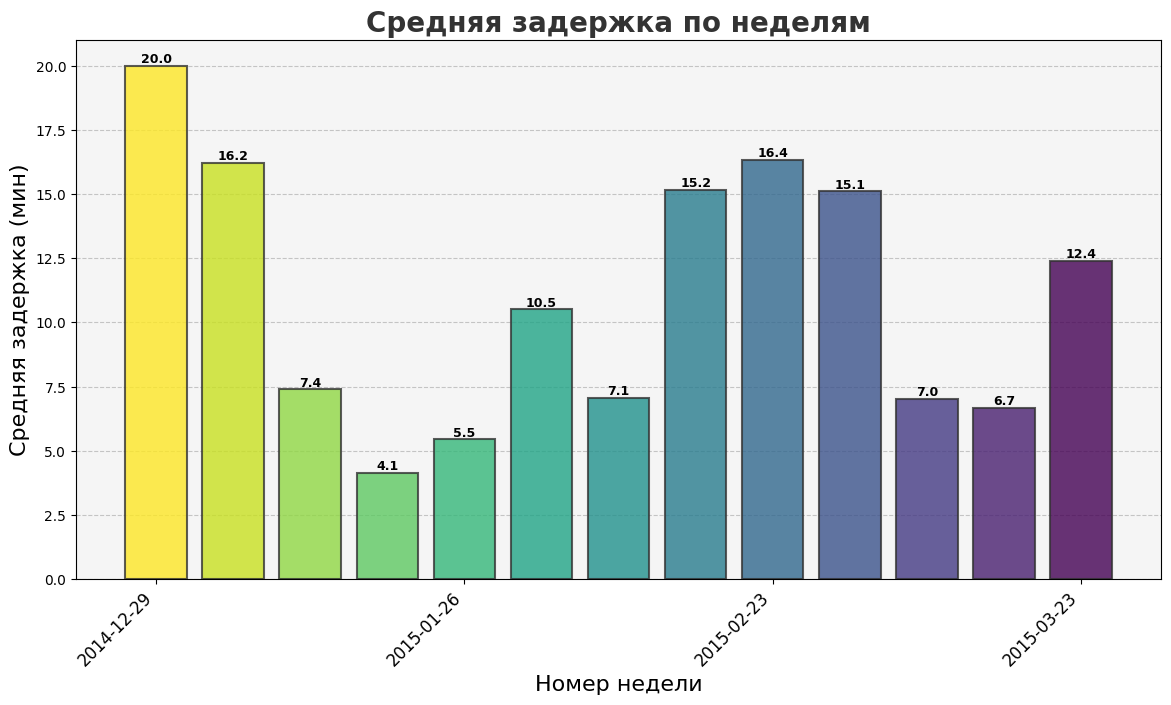

In [33]:
plt.figure(figsize=(14, 7))

colors = plt.cm.viridis(np.linspace(1, 0, len(grp5)))

plt.title('Средняя задержка по неделям', fontsize=20, fontweight='bold', color='#333333')
plt.xlabel('Номер недели', fontsize=16)
plt.ylabel('Средняя задержка (мин)', fontsize=16)

bars = plt.bar(grp5['week_number'], grp5['DEPARTURE_DELAY'], color=colors, edgecolor='black', alpha=0.8, zorder=2)
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, f'{yval:.1f}', ha='center', va='bottom', fontsize=9, color='black', fontweight='bold')
    bar.set_linewidth(1.5)
    bar.set_edgecolor('#333333')


plt.xticks(grp5['week_number'][::4], grp5['start_of_week'].dt.strftime('%Y-%m-%d')[::4], rotation=45, ha='right', fontsize=12)

plt.grid(axis='y', linestyle='--', alpha=0.7, zorder=1)

plt.gca().set_facecolor('whitesmoke')
plt.gcf().patch.set_facecolor('white')

plt.show()


Заметим, что нагрузка аэропортов значительно повышается в праздничные дни, а поэтому растет и средняя задержка. <br>
На графике эти всплески видны:
*   День Благодорения - четвертый четверг ноября - 12.6
*   Рождество и Новый год - от 16.2 до 25.7
*   Washington's Birthday - третий понедельник февраля - 16.4
*   Juneteenth - 19.06 - 19.0 <br>
и т.д.





Из проделанной работы напрашивается очевидный вывод: если не хотите проводить в аэропорту США лишнее время - планируйте вылет на утреннее время и не в окрестности праздничных дней, пользуйтесь услугами зарекомендовавших себя авиакомпаний.